<a href="https://colab.research.google.com/github/Kingsleyohio/WQI/blob/main/WQI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Load libraries
import numpy as np
from matplotlib import pyplot as plt
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.ensemble import IsolationForest
#from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

# run block of code and catch warnings
import warnings
with warnings.catch_warnings():
	# ignore all caught warnings
	warnings.filterwarnings("ignore")
	# execute code that will generate warnings
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

# Load dataset
data = read_csv('/content/WQI.csv')
data

,Cd,Cu,Pb,Zn,Alkal,BOD,COD,Fecal_Col,Hardness,NO2,...,Total_P,Temp,DO,DO%,pH,Turb,Cond,Level,Flow,WQI
0,0.0002,0.003,0.003,0.029,46.0,2.00,10.0,46,43.0,7.300,...,0.328,3.71,13.19,100.0,7.31,10.90,287.0,2.00,17.0,65.90
1,0.0002,0.002,0.003,0.031,97.0,2.00,6.0,25,74.0,0.873,...,0.034,0.35,16.05,111.0,8.19,3.84,363.0,NaN,NaN,83.75
2,0.0002,0.003,0.003,0.008,62.0,2.00,13.0,460,36.0,0.403,...,0.153,0.60,13.07,90.9,7.37,8.97,188.0,NaN,NaN,75.84
3,0.0002,0.002,0.003,0.015,55.0,2.00,5.0,40,45.0,0.567,...,0.065,1.16,13.72,97.0,7.36,7.97,56.0,2.09,3.4,83.71
4,0.0002,0.002,0.003,0.037,56.0,2.00,39.0,51,44.0,0.577,...,0.040,0.72,14.29,99.8,7.40,3.50,272.0,0.89,1.9,84.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1840,0.0002,0.008,0.004,0.035,39.5,3.32,34.0,5400,40.8,1.380,...,0.138,24.31,8.64,105.4,6.49,93.40,175.0,3.05,185.0,57.74
1841,0.0002,0.004,0.003,0.079,76.3,3.79,61.0,128,73.4,7.710,...,0.563,19.80,7.38,80.9,7.02,6.96,278.0,2.35,78.0,58.16
1842,0.0002,0.003,0.003,0.023,94.0,2.00,34.0,180,74.2,5.950,...,0.209,18.04,12.23,129.5,7.29,5.18,691.0,2.33,72.0,67.77
1843,0.0002,0.005,0.003,0.043,61.7,3.89,29.0,112,64.6,1.770,...,0.233,9.72,12.80,112.8,6.92,42.40,304.0,3.08,194.0,70.00


In [5]:
#Run Descriptive Statistics of raw data for data insight
print(data.head(10),data.tail(10))
print(data.describe())
print(data.shape)
print(data.dtypes)

       Cd     Cu     Pb     Zn  Alkal  BOD   COD Fecal_Col  Hardness    NO2  \
0  0.0002  0.003  0.003  0.029   46.0  2.0  10.0        46      43.0  7.300   
1  0.0002  0.002  0.003  0.031   97.0  2.0   6.0        25      74.0  0.873   
2  0.0002  0.003  0.003  0.008   62.0  2.0  13.0       460      36.0  0.403   
3  0.0002  0.002  0.003  0.015   55.0  2.0   5.0        40      45.0  0.567   
4  0.0002  0.002  0.003  0.037   56.0  2.0  39.0        51      44.0  0.577   
5  0.0002  0.002  0.003  0.009   65.0  2.0   5.0         1      46.0  0.276   
6  0.0002  0.002  0.003  0.010   71.0  2.0   6.0      1200      53.0  0.395   
7  0.0002  0.002  0.003  0.020   59.0  2.0   9.0        19      38.0  0.381   
8  0.0002  0.002  0.003  0.024   92.0  2.0   6.0       108      78.0  0.411   
9  0.0002  0.002  0.003  0.010   70.0  2.0   5.0        42      60.0  0.479   

   ...  Total_P  Temp     DO    DO%    pH   Turb   Cond  Level   Flow    WQI  
0  ...    0.328  3.71  13.19  100.0  7.31  10.90  2

           Cd      Cu      Pb      Zn   Alkal     BOD     COD  Hardness  \
count  1845.0  1845.0  1845.0  1845.0  1845.0  1844.0  1845.0    1845.0   
mean      0.0     0.0     0.0     0.0    54.3     2.6    17.9      60.8   
std       0.0     0.0     0.0     0.4    23.8     2.1    11.2      27.9   
min       0.0     0.0     0.0     0.0     1.0     2.0     0.5       6.0   
25%       0.0     0.0     0.0     0.0    36.3     2.0    10.0      38.2   
50%       0.0     0.0     0.0     0.0    49.6     2.0    16.0      56.8   
75%       0.0     0.0     0.0     0.0    68.3     2.2    24.0      78.0   
max       0.0     0.0     0.0    18.0   159.0    61.6   117.0     177.0   

          NO2     NO3  ...  Total_P    Temp      DO     DO%      pH    Turb  \
count  1845.0  1845.0  ...   1845.0  1844.0  1833.0  1833.0  1844.0  1845.0   
mean      0.7     0.0  ...      0.1    15.6     9.6    95.1     7.4    28.0   
std       1.9     0.1  ...      0.1     7.4     3.2    36.2     3.2    49.7   
min     

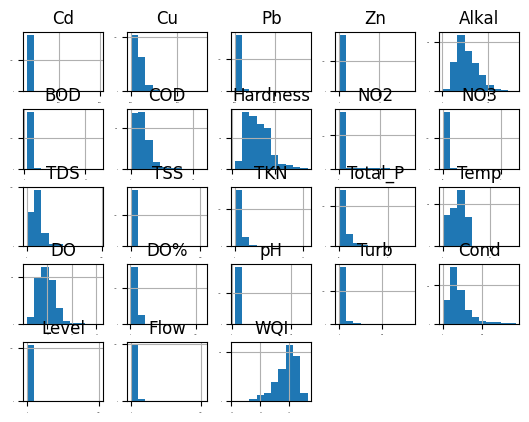

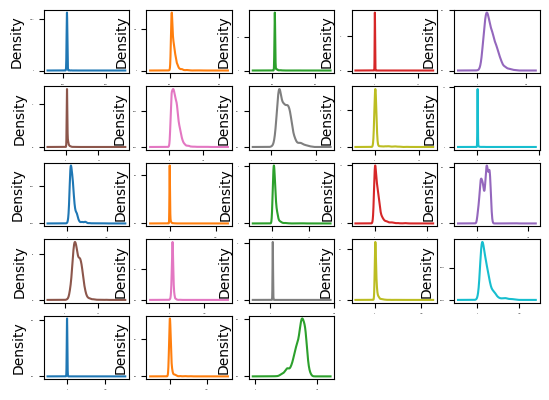

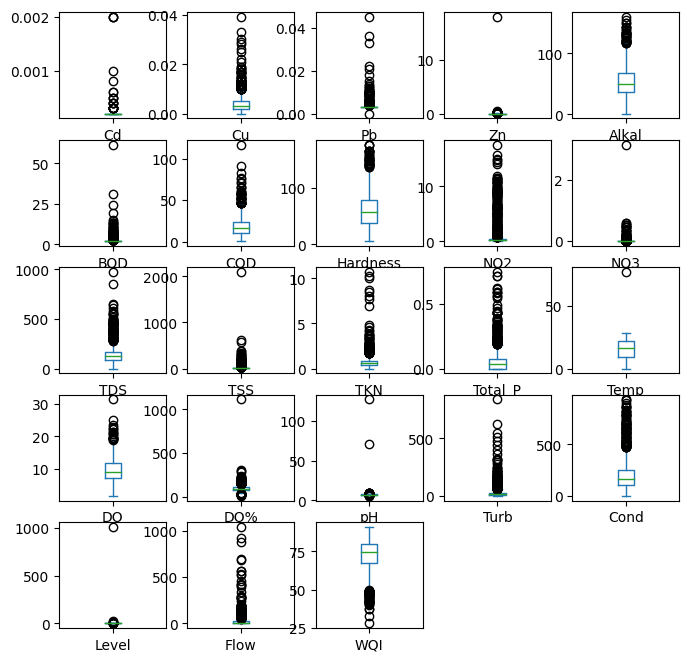

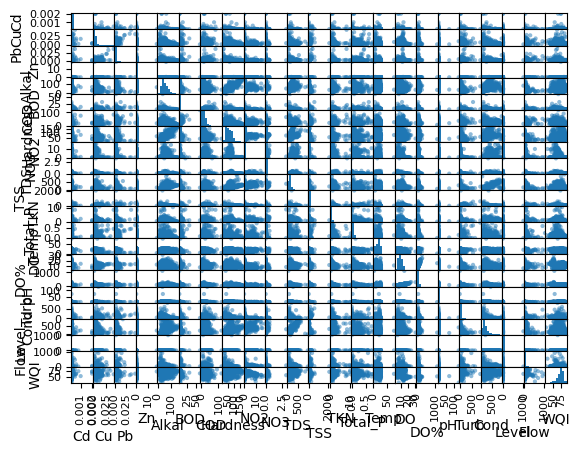

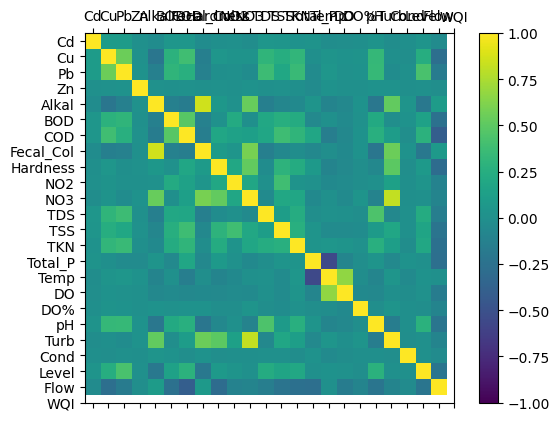

In [6]:
col_name = ['Cd','Cu','Pb','Zn','Alkal','BOD','COD','Fecal_Col','Hardness','NO2','NO3','TDS',
         'TSS','TKN','Total_P','Temp','DO','DO%','pH','Turb','Cond','Level','Flow','WQI']

print(data.describe().round(1))
# correlation
print(data.corr(method='pearson').round(2))
##
#Unimodal Data Visualizations - histograms
data.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
plt.show()
#
# density
data.plot(kind='density', subplots=True, layout=(5,5), sharex=False, legend=False, fontsize=1)
plt.show()

# box and whisker plots
data.plot(kind ='box', subplots = True, layout = (5,5), figsize = (8,8), sharex = False)
plt.show()

#Multimodal Data Visualizations - scatter plot matrix
scatter_matrix(data)
plt.show()
# correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(data.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
ticks = np.arange(0,24,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(data[col_name])
ax.set_yticklabels(data[col_name])
plt.show()

In [7]:
#drop empty cells
data2 = data.dropna()
#print (data2.head(5),data2.tail(5))
#peek into clean data
#print(data2.describe())
#print(data2.shape)

#Remove Outliers
Q1 = data2.quantile(.25, axis=0)
Q2 = data2.quantile(.5, axis=0)
Q3 = data2.quantile(.75, axis=0)
IQR = Q3 - Q1
#print(IQR)

Lower_Limit = Q1 - 1.5 * IQR
Upper_Limit = Q3 + 1.5 * IQR
Outliers = data2 [ ((data2 < Lower_Limit) | ((data2 > Upper_Limit))).any(axis=1) ]
#print(Outliers)

no_outliers = data2 [ ~((data2 < Lower_Limit) | (data2 > Upper_Limit)).any(axis=1) ]
#print(no_outliers)

df = no_outliers

from scipy import stats

# Calculate Z scores
numeric_cols = df.select_dtypes(include=np.number)
z = np.abs(stats.zscore(numeric_cols))
#print(z)

In [46]:
#Normalize and standardize dataset
#from sklearn.svm import SVC
import pandas as pd
from sklearn.preprocessing import Normalizer
from numpy import set_printoptions
from pandas import set_option
pd.set_option('display.width', 100)
pd.set_option('display.max_columns', 50)
import pandas as pd

#split data frame into dependent and independent variables
x = df.iloc[:,0:23].values
Y = df.iloc[:,23].values

#Normalize Data
scaler = Normalizer().fit(x)
normalizedX = scaler.transform(x)
# summarize transformed data
set_printoptions(precision=3)
#print(normalizedX[0:5,:]) #shows first 5 rows of Normalized Data

#Standardize Data
scaler = StandardScaler().fit(x)
rescaledX = scaler.transform(x)

# summarize transformed data
set_printoptions(precision=3)
print(rescaledX[0:5,:]) #shows first 5 rows of Standardized Data

[[-2.711e-20 -6.254e-01 -4.337e-19  1.451e-01  6.916e-02 -2.306e-01
  -1.052e+00 -3.964e-01 -6.349e-01  2.146e+00  0.000e+00  7.073e-01
   1.760e-01  5.505e-01  1.227e+00 -1.858e+00  1.529e+00  2.565e-01
   1.714e-01 -6.390e-01 -1.405e+00  1.149e-01 -4.649e-01]
 [-2.711e-20 -6.254e-01 -4.337e-19  2.841e+00  1.186e-01 -2.306e-01
   3.589e+00 -3.901e-01 -6.767e-01  2.211e+00  0.000e+00 -1.030e-01
  -9.931e-01  4.037e-01  3.970e-01 -1.917e+00  1.735e+00  4.022e-01
   3.033e-01 -9.955e-01  1.286e+00 -1.080e+00 -6.529e-01]
 [-2.711e-20 -6.254e-01 -4.337e-19 -5.900e-01  5.631e-01 -2.306e-01
  -1.052e+00 -4.186e-01 -5.931e-01  2.589e-01  0.000e+00 -5.429e-01
  -7.983e-01 -5.030e-01 -3.478e-02 -1.817e+00  1.623e+00  3.917e-01
   1.028e+00 -8.559e-01  4.388e-01 -1.259e+00 -8.221e-01]
 [-2.711e-20 -6.254e-01 -4.337e-19 -4.675e-01  8.595e-01 -2.306e-01
  -9.153e-01  2.648e-01 -3.004e-01  1.031e+00  0.000e+00  3.369e-01
  -6.034e-01  7.267e-01  3.970e-01 -1.886e+00  7.992e-01 -5.082e-01
   1.055e-

Cd              Axes(0.125,0.747241;0.133621x0.132759)
Cu           Axes(0.285345,0.747241;0.133621x0.132759)
Pb            Axes(0.44569,0.747241;0.133621x0.132759)
Zn           Axes(0.606034,0.747241;0.133621x0.132759)
Alkal        Axes(0.766379,0.747241;0.133621x0.132759)
BOD             Axes(0.125,0.587931;0.133621x0.132759)
COD          Axes(0.285345,0.587931;0.133621x0.132759)
Fecal_Col     Axes(0.44569,0.587931;0.133621x0.132759)
Hardness     Axes(0.606034,0.587931;0.133621x0.132759)
NO2          Axes(0.766379,0.587931;0.133621x0.132759)
NO3             Axes(0.125,0.428621;0.133621x0.132759)
TDS          Axes(0.285345,0.428621;0.133621x0.132759)
TSS           Axes(0.44569,0.428621;0.133621x0.132759)
TKN          Axes(0.606034,0.428621;0.133621x0.132759)
Total_P      Axes(0.766379,0.428621;0.133621x0.132759)
Temp             Axes(0.125,0.26931;0.133621x0.132759)
DO            Axes(0.285345,0.26931;0.133621x0.132759)
DO%            Axes(0.44569,0.26931;0.133621x0.132759)
pH        

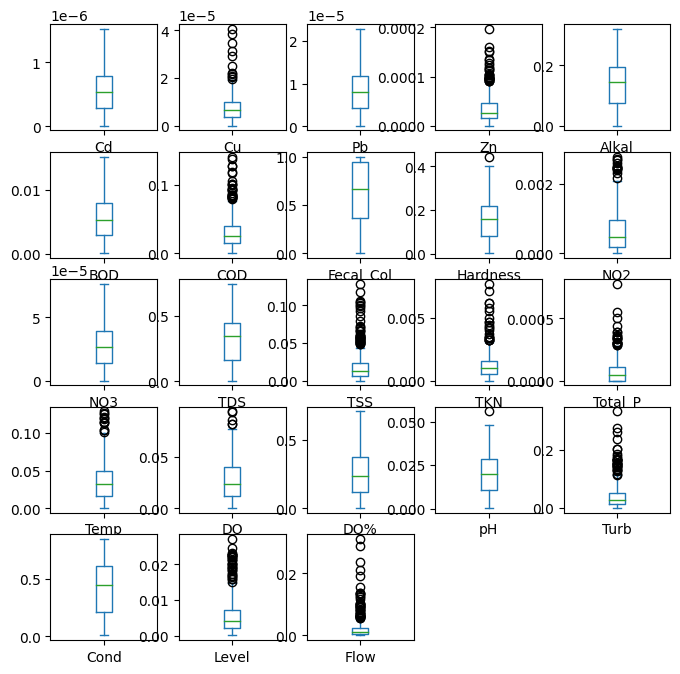

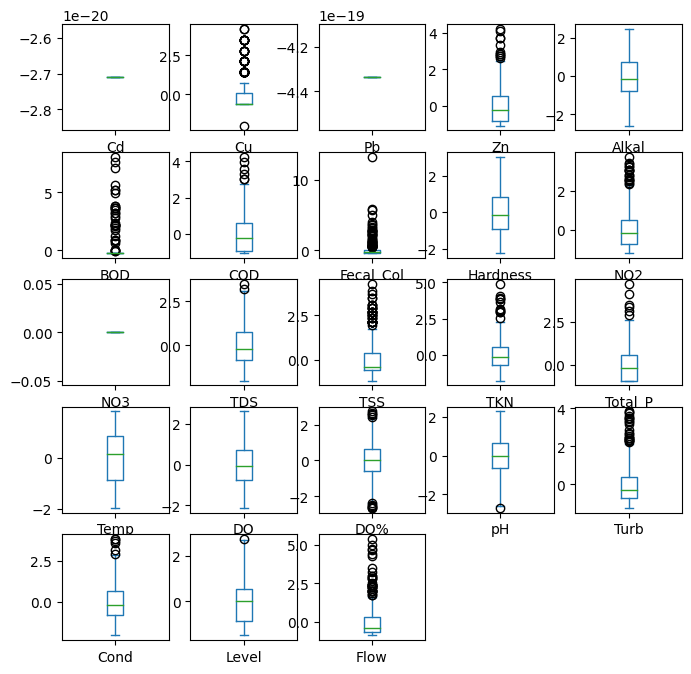

In [9]:
#Compare standardized to normalized data for decision making
from pickle import FALSE
header = ['Cd','Cu','Pb','Zn','Alkal','BOD','COD','Fecal_Col','Hardness','NO2','NO3','TDS',
         'TSS','TKN','Total_P','Temp','DO','DO%','pH','Turb','Cond','Level','Flow']
norm_X = pd.DataFrame(normalizedX, columns = header)
stand_X = pd.DataFrame(rescaledX, columns = header)

norm_X.plot(kind ='box', subplots = True, layout = (5,5), figsize = (8,8), sharex = False)
stand_X.plot(kind ='box', subplots = True, layout = (5,5), figsize = (8,8), sharex = False)

LR: Mean MSE: 21.670, Standard Deviation: 7.843
LASSO: Mean MSE: 23.779, Standard Deviation: 7.693
KNN: Mean MSE: 24.588, Standard Deviation: 8.788
DTR: Mean MSE: 43.006, Standard Deviation: 12.132
RFR: Mean MSE: 21.012, Standard Deviation: 8.331
SVR: Mean MSE: 20.072, Standard Deviation: 7.011
CART: Mean MSE: 43.592, Standard Deviation: 11.704
EN: Mean MSE: 23.436, Standard Deviation: 7.414


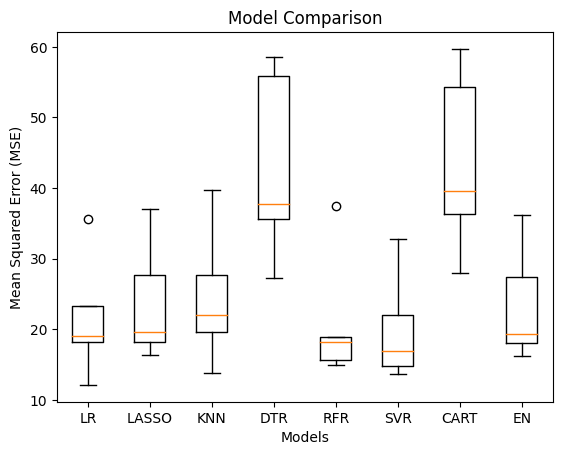

In [77]:
from sklearn.decomposition import TruncatedSVD

# Assuming the first 23 columns (0-22) are the dependent variables (x)
XX = stand_X

# Assuming the last column (23) is the independent variable (y)
Y = df.iloc[:, -1]

# Standardize the data
scaler = StandardScaler()
X_standardized = scaler.fit_transform(XX)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X_standardized, Y, test_size=0.2, random_state=42)

# Define models to evaluate with short labels
models = [
    ('LR', LinearRegression()),
    ('LASSO', Lasso()),
    ('KNN', KNeighborsRegressor()),
    ('DTR', DecisionTreeRegressor()),
    ('RFR', RandomForestRegressor()),
    ('SVR', SVR()),
    ('CART', DecisionTreeRegressor()),
    ('EN', ElasticNet())
]

# Evaluate each model using cross-validation
results = []
names = []
for name, model in models:
    steps = [
        ('svd', TruncatedSVD(n_components=10)),  # reduce dimensionality using SVD to 10 components
        ('model', model)
    ]
    pipeline = Pipeline(steps=steps)
    cv_scores = -cross_val_score(pipeline, x_train, y_train, scoring='neg_mean_squared_error', cv=5)
    results.append(cv_scores)
    names.append(name)
    print(f'{name}: Mean MSE: {np.mean(cv_scores):.3f}, Standard Deviation: {np.std(cv_scores):.3f}')

# Compare model performance using boxplots
import matplotlib.pyplot as plt
plt.boxplot(results, labels=names)
plt.title('Model Comparison')
plt.ylabel('Mean Squared Error (MSE)')
plt.xlabel('Models')
plt.show()

In [78]:
import pandas as pd
from sklearn.decomposition import PCA

# Assuming 'df' is the pandas DataFrame with the dependent variable 'x' and independent variable 'y'

# Extract the dependent variable 'X'
#X

# Extract the independent variable 'Y'
#Y = df.iloc[:, 23]

# Create an instance of PCA
pca = PCA(n_components=10)

# Fit PCA on the dependent variable 'X'
pca.fit(XX)

# Get the indices of the top 10 features with the highest absolute correlation to 'Y'
feature_indices = abs(pca.components_).argsort(axis=1)[:, -20:]

# Get the names of the top 10 features
feature_names = df.columns[:-1][feature_indices.flatten()].unique()[:20]

# Select the top 10 features from the original DataFrame 'df'
df_reduced = df[feature_names.tolist()]

# Print the reduced DataFrame
print(df_reduced)

         Cu Fecal_Col   COD    TKN   Temp    NO2  BOD  Total_P     DO    DO%     Zn   Turb  Level  \
3     0.002        40   5.0  0.639   1.16  0.567  2.0    0.065  13.72   97.0  0.015   7.97   2.09   
4     0.002        51  39.0  0.599   0.72  0.577  2.0    0.040  14.29   99.8  0.037   3.50   0.89   
5     0.002         1   5.0  0.352   1.46  0.276  2.0    0.027  13.98   99.6  0.009   5.25   0.71   
6     0.002      1200   6.0  0.687   0.95  0.395  2.0    0.040  11.70   82.3  0.010  14.70   1.88   
7     0.002        19   9.0  0.658   0.32  0.381  2.0    0.045  14.43   99.6  0.020  14.00   1.13   
...     ...       ...   ...    ...    ...    ...  ...      ...    ...    ...    ...    ...    ...   
1647  0.002       480   9.0  0.436  25.32  0.265  2.0    0.000   8.78  108.7  0.006  10.30   2.07   
1648  0.002       740  10.0  1.040  23.45  0.084  2.0    0.000   8.20   98.5  0.014  26.30   2.36   
1649  0.002        88   9.0  1.020  16.07  0.220  2.0    0.024  11.55  117.2  0.010   9.24 

LR: Mean MSE: 21.670, Standard Deviation: 7.843
LASSO: Mean MSE: 23.779, Standard Deviation: 7.693
KNN: Mean MSE: 24.588, Standard Deviation: 8.788
DTR: Mean MSE: 42.328, Standard Deviation: 10.021
RFR: Mean MSE: 20.939, Standard Deviation: 8.559
SVR: Mean MSE: 20.072, Standard Deviation: 7.011
CART: Mean MSE: 45.316, Standard Deviation: 13.332
EN: Mean MSE: 23.436, Standard Deviation: 7.414


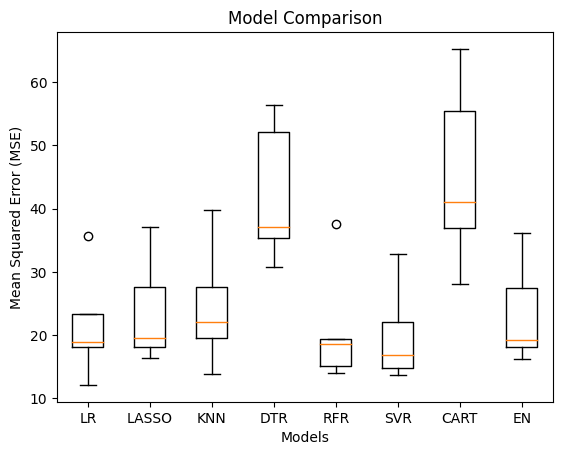

In [79]:
# Standardize the data
scaler = StandardScaler()
standardized_X = scaler.fit_transform(df_reduced)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(standardized_X, Y, test_size=0.2, random_state=42)

# Define models to evaluate with short labels
models = [
    ('LR', LinearRegression()),
    ('LASSO', Lasso()),
    ('KNN', KNeighborsRegressor()),
    ('DTR', DecisionTreeRegressor()),
    ('RFR', RandomForestRegressor()),
    ('SVR', SVR()),
    ('CART', DecisionTreeRegressor()),
    ('EN', ElasticNet())
]

# Evaluate each model using cross-validation
results = []
names = []
for name, model in models:
    steps = [
        ('svd', TruncatedSVD(n_components=10)),  # reduce dimensionality using SVD to 10 components
        ('model', model)
    ]
    pipeline = Pipeline(steps=steps)
    cv_scores = -cross_val_score(pipeline, x_train, y_train, scoring='neg_mean_squared_error', cv=5)
    results.append(cv_scores)
    names.append(name)
    print(f'{name}: Mean MSE: {np.mean(cv_scores):.3f}, Standard Deviation: {np.std(cv_scores):.3f}')

# Compare model performance using boxplots
import matplotlib.pyplot as plt
plt.boxplot(results, labels=names)
plt.title('Model Comparison')
plt.ylabel('Mean Squared Error (MSE)')
plt.xlabel('Models')
plt.show()

In [83]:
from sklearn.linear_model import LinearRegression

# Assuming 'df_reduced' is the reduced data set with 10 dependent variables (X), 1 independent variable (Y), and an index column

# Extract the dependent variables 'X' from the reduced data set
X = df_reduced

# Extract the independent variable 'Y' from the reduced data set
Y

# Store the index column
index_col = df_reduced.index

# Create an instance of Linear Regression
model = LinearRegression()

# Fit the model on the dependent variables 'X' and independent variable 'Y'
model.fit(X, Y)

# Make predictions on the same data set 'X'
predictions = model.predict(X)

# Create a DataFrame with the original 'X' and predicted 'Y'
predictions_df = pd.DataFrame({'Predicted Y': predictions}, index=index_col)

# Print the DataFrame with the predictions
predictions_df.to_csv('predictions_df.csv', index=FALSE)
print(predictions_df.head())

   Predicted Y
3    82.610356
4    80.106922
5    83.765089
6    79.231274
7    81.927315


In [88]:
# Concatenate the Engineered features with the independent variable 'Y'
Pred_Y = pd.concat([df_reduced, predictions_df], axis=1)
Pred_Y.to_csv('Pred_Y.csv', index=FALSE)